In [2]:
from src.utils_py.auxil import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib widget

---

In [34]:
theta = np.deg2rad(150)

N_phi = 500
M_l = 500

l_max = 7

In [35]:
X_phi = np.linspace(0, 1, N_phi, endpoint=True)
Y_l = np.linspace(0.001, l_max, M_l, endpoint=True)

Z_surf = np.zeros((M_l, N_phi, 6))

for i, phi in np.ndenumerate(X_phi):
    for j, l in np.ndenumerate(Y_l):
        S = np.array([
            S_droplet_theta(l, phi, theta),
            S_doughnut_theta(l, phi, theta),
            S_worm_theta(l, phi, theta),
            S_roll_theta(l, phi, theta),
            S_perforation_theta(l, phi, theta),
            S_layer_theta(l, phi, theta)
        ])

        Z_surf[i, j, :] = S

X_phi, Y_l = np.meshgrid(X_phi, Y_l)

In [36]:
mask = np.isinf(Z_surf)
Z_surf[mask] = np.nan

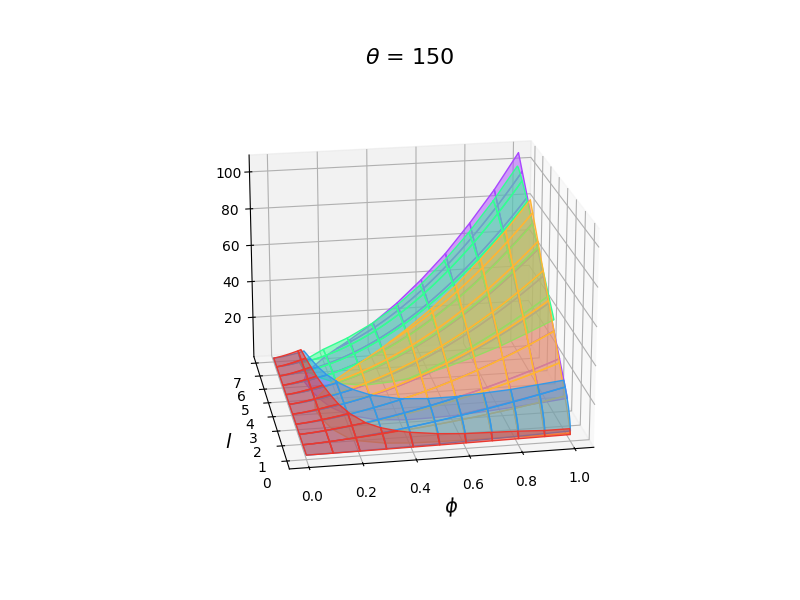

In [49]:
%matplotlib widget

ax = plt.figure(figsize=(8, 6)).add_subplot(projection='3d')

colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]

for i in range(len(colors)-1):
    ax.plot_surface(
        X_phi, Y_l, Z_surf[:, :, i],
        edgecolor=colors[i],
        color=colors[i],
        shade=False,
        alpha=0.5,
        lw=1,
        rstride=50,
        cstride=50,
        vmin=0
    )

ax.view_init(elev=20, azim=-100)

plt.title(r'$\theta$ = '+str(int(np.rad2deg(theta))), fontsize=16)
ax.set_xlabel(r'$\phi$', fontsize=14)
ax.set_ylabel(r'$l$', fontsize=14)

plt.show()

In [47]:
Y_l[150, 0]

2.1049078156312624

l: 7.0


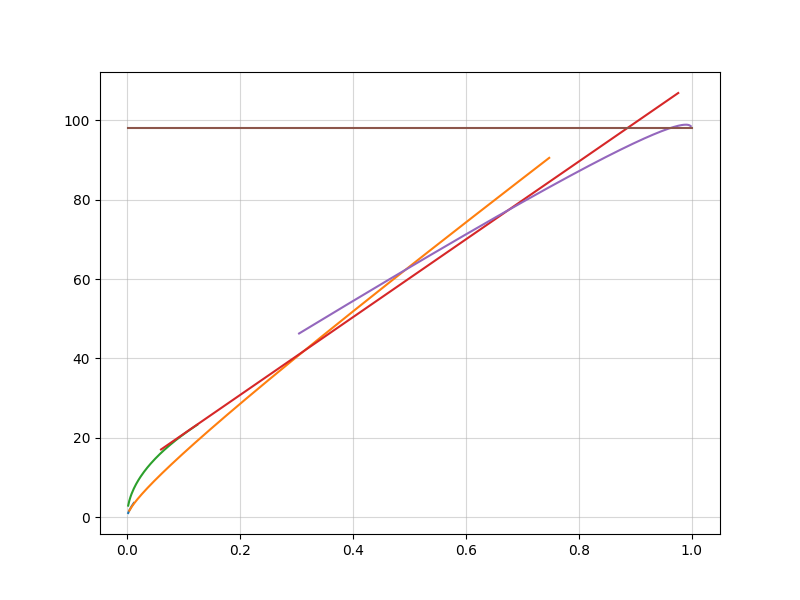

In [57]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

l=499
print('l:', Y_l[l, 0])

for i in range(len(colors)):
    plt.plot(X_phi[0], Z_surf[:, l, i])


